In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
wbcd = pd.read_csv("Datasets\wbcd.csv")

In [5]:
wbcd.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.1242,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881


In [6]:
wbcd.drop(["id"],axis=1,inplace=True) # Dropping the uncessary column 

In [7]:
wbcd.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [8]:
wbcd.shape

(569, 31)

In [9]:
wbcd.isnull().sum() # No missing values 

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [10]:
wbcd.loc[wbcd.diagnosis=="B","diagnosis"] = 1
wbcd.loc[wbcd.diagnosis=="M","diagnosis"] = 0

In [11]:
X = wbcd.drop(["diagnosis"],axis=1)
Y = wbcd["diagnosis"].astype('int')

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

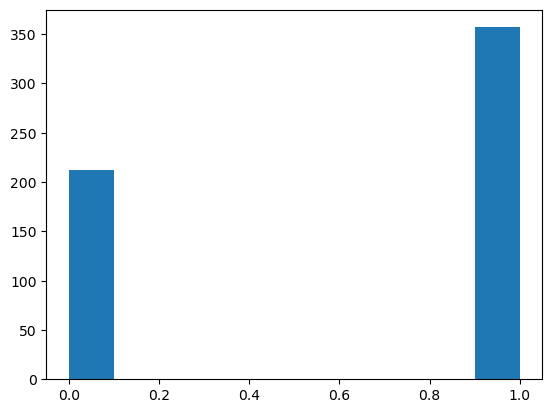

In [12]:
plt.hist(Y)

In [13]:
wbcd.diagnosis.value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y) #Default percentage is 75 - 25 split

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(X_train) #computaion of Mean and Std to be used later as shown below...

StandardScaler()

In [28]:
#X_train = scaler.fit_transform(X_train) #or else we can directly use fittransform to transform the data directly

In [15]:
#OR

#def norm(i):
#    temp=i-np.mean(i)/np.std(i)
#    return temp

In [17]:
#Now apply standardization to the data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30))

In [20]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'id

In [21]:
mlp.fit(X_train,Y_train)

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(30, 30))

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
prediction_train = mlp.predict(X_train)
prediction_test = mlp.predict(X_test)

In [24]:
print(confusion_matrix(Y_train,prediction_train))
print("\n")
print(confusion_matrix(Y_test,prediction_test))

[[151   2]
 [  0 273]]


[[57  2]
 [ 1 83]]


In [26]:
X_test.shape

(143, 30)

In [27]:
pd.crosstab(Y_train,prediction_train)

col_0,0,1
diagnosis,,
0,151,2
1,0,273


In [28]:
pd.crosstab(Y_test,prediction_test)

col_0,0,1
diagnosis,,
0,57,2
1,1,83
